# Background Information on Datasets

# 1. Load Required Libraries

In [1]:
# Load Required Libraries
import pandas as pd; 
import numpy as np; 
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.figure import Figure
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
import param
#import hvplot.pandas
#import panel as pn
#pn.extension()
#mpl.use('agg')




from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

# 2. Read Data Files

In [2]:
# Read Data Files
dataset1_csv_file = "data/Dataset2.csv"
df1 = pd.read_csv(dataset1_csv_file)

dataset2_csv_file = "data/Credit Card Customer Churn.csv"
df2 = pd.read_csv(dataset2_csv_file)

# 3. Understanding the Datasets

In [3]:
# peek into dataset 1
df1.head()
df1.tail()

# peek into dataset 2
df2.head()
df2.tail()

,CUST_ID,SEX,AGE,EDUCATION,INVESTMENT,INCOME,ACTIVITY,CHURN,YRLY_AMT,AVG_DAILY_TX,YRLY_TX,AVG_TX_AMT,NEGTWEETS,STATE,EDUCATION_GROUP,TWITTERID,CHURN_LABEL
5996,1009569950,M,66,1,0,13024,1,0,6638.5510,0.660274,241,27.545898,4,NJ,High school graduate,0.0,False
5997,1009541780,M,29,1,0,13020,4,0,6094.6406,0.657534,240,25.394302,4,NV,High school graduate,0.0,False
5998,1009550850,M,33,1,0,13010,1,1,6348.0900,0.668493,244,26.016800,14,ND,High school graduate,0.0,True
5999,1009527790,M,61,4,0,13007,3,0,7482.5117,0.690411,252,29.692505,3,CA,Associate degree,0.0,False
6000,1009572520,F,58,1,0,13003,3,0,6453.8710,0.665753,243,26.559097,1,AK,High school graduate,0.0,False


Since we have two different datasets, we need to perform data standardization and cleaning before we proceed with our analysis. As we can see, in the second dataset, "Customer"

In [4]:
# Format all columns
# print original data frame
print(df2.columns)

# remove special character
df2.columns = df2.columns.str.replace(' ', '')

# Remname the columns in df2 to match the column in df1
df2 = df2.rename(columns={'CUST_ID': 'CustomerId', 'AGE':'Age', 'INCOME':'EstimatedSalary', 'CHURN':'Exited', 
                          'INVESTMENT': 'Investment', 'ACTIVITY':'Activity', 'YRLY_AMT':'Yearly Amt', 
                          'AVG_DAILY_TX':'Avg Daily Tax', 'AVG_DAILY_TX':'Avg Daily Tax',
                          'YRLY_TX':'Yearly Tax', 'AVG_TX_AMT':'Avg Tax Amt', 'NEGTWEETS':'Negtweets', 'STATE':'State',
                          'EDUCATION':'Education',
                          'EDUCATION_GROUP':'Education Group', 'TWITTERID':'TwitterID'
                          })

# Since dataset is for all the different states in US, we can assume that the Geography value as 'United States'
if 'Geography' not in df2:
    df2.insert(loc=1,
            column='Geography',
            value='United States')

# Check how many unique values in 'SEX' column df2
print("Unique Values for Sex Column: ", pd.unique(df2['SEX']))

# Applying the condition to create a gender column based on the value in SEX column of the df2
df2['Gender'] = np.where((df2['SEX']  == 'F'), 'Female', 'Male')

df2.describe()

Index(['CUST_ID', 'SEX', 'AGE', 'EDUCATION', 'INVESTMENT', 'INCOME',
       'ACTIVITY', 'CHURN', ' YRLY_AMT', 'AVG_DAILY_TX', 'YRLY_TX',
       'AVG_TX_AMT', 'NEGTWEETS', 'STATE', 'EDUCATION_GROUP', 'TWITTERID',
       ' CHURN_LABEL'],
      dtype='object')
Unique Values for Sex Column:  ['F' 'M']


,CustomerId,Age,Education,Investment,EstimatedSalary,Activity,Exited,Yearly Amt,Avg Daily Tax,Yearly Tax,Avg Tax Amt,Negtweets,TwitterID
count,6.001000e+03,6001.000000,6001.000000,6001.000000,6.001000e+03,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6.001000e+03
mean,1.009550e+09,48.504083,2.100650,8788.980503,3.689169e+04,2.199133,0.254791,12527.073380,0.683584,249.508249,48.280455,4.805699,2.749704e+14
std,1.732484e+04,16.062950,1.367431,25914.903560,1.184143e+05,1.415217,0.435780,21869.459623,0.039624,14.462767,64.069223,3.534436,1.506082e+16
min,1.009520e+09,20.000000,1.000000,0.000000,1.300300e+04,0.000000,0.000000,6094.640600,0.649315,237.000000,25.394302,0.000000,0.000000e+00
25%,1.009535e+09,36.000000,1.000000,0.000000,1.687300e+04,1.000000,0.000000,8053.390600,0.660274,241.000000,32.864304,3.000000,0.000000e+00
50%,1.009550e+09,47.000000,1.000000,0.000000,2.052400e+04,2.000000,0.000000,9243.262000,0.665753,243.000000,37.658005,3.000000,0.000000e+00
75%,1.009565e+09,60.000000,4.000000,0.000000,2.957500e+04,3.000000,1.000000,12161.602000,0.698630,255.000000,49.571396,5.000000,0.000000e+00
max,1.009580e+09,90.000000,5.000000,119927.000000,3.852862e+06,5.000000,1.000000,726977.000000,0.994521,363.000000,2095.040000,19.000000,8.275482e+17


# 4. Merge the two data files

In [5]:
merged_df = pd.merge(df1, df2, on=['CustomerId', 'Age', 'Gender', 'EstimatedSalary', 'Exited', 'Geography'], how='outer')


#check raw data
print(merged_df.head())

merged_df

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0        1.0    15634602  Hargrave        619.0    France  Female   42   
1        2.0    15647311      Hill        608.0     Spain  Female   41   
2        3.0    15619304      Onio        502.0    France  Female   42   
3        4.0    15701354      Boni        699.0    France  Female   39   
4        5.0    15737888  Mitchell        850.0     Spain  Female   43   

   Tenure     Balance  NumOfProducts  ...  Activity  Yearly Amt  \
0     2.0         0.0            1.0  ...       NaN         NaN   
1     1.0   8380786.0            1.0  ...       NaN         NaN   
2     8.0   1596608.0            3.0  ...       NaN         NaN   
3     1.0         0.0            2.0  ...       NaN         NaN   
4     2.0  12551082.0            1.0  ...       NaN         NaN   

   Avg Daily Tax  Yearly Tax Avg Tax Amt  Negtweets  State  Education Group  \
0            NaN         NaN         NaN        NaN    NaN              N

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Activity,Yearly Amt,Avg Daily Tax,Yearly Tax,Avg Tax Amt,Negtweets,State,Education Group,TwitterID,CHURN_LABEL
0,1.0,15634602,Hargrave,619.0,France,Female,42,2.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,15647311,Hill,608.0,Spain,Female,41,1.0,8380786.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,15619304,Onio,502.0,France,Female,42,8.0,1596608.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,15701354,Boni,699.0,France,Female,39,1.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,15737888,Mitchell,850.0,Spain,Female,43,2.0,12551082.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15996,NaN,1009569950,NaN,NaN,United States,Male,66,NaN,NaN,NaN,...,1.0,6638.5510,0.660274,241.0,27.545898,4.0,NJ,High school graduate,0.0,False
15997,NaN,1009541780,NaN,NaN,United States,Male,29,NaN,NaN,NaN,...,4.0,6094.6406,0.657534,240.0,25.394302,4.0,NV,High school graduate,0.0,False
15998,NaN,1009550850,NaN,NaN,United States,Male,33,NaN,NaN,NaN,...,1.0,6348.0900,0.668493,244.0,26.016800,14.0,ND,High school graduate,0.0,True
15999,NaN,1009527790,NaN,NaN,United States,Male,61,NaN,NaN,NaN,...,3.0,7482.5117,0.690411,252.0,29.692505,3.0,CA,Associate degree,0.0,False


# Peek into the final dataset

In [6]:
# peek into dataset
merged_df.head()
merged_df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Activity,Yearly Amt,Avg Daily Tax,Yearly Tax,Avg Tax Amt,Negtweets,State,Education Group,TwitterID,CHURN_LABEL
15996,NaN,1009569950,NaN,NaN,United States,Male,66,NaN,NaN,NaN,...,1.0,6638.5510,0.660274,241.0,27.545898,4.0,NJ,High school graduate,0.0,False
15997,NaN,1009541780,NaN,NaN,United States,Male,29,NaN,NaN,NaN,...,4.0,6094.6406,0.657534,240.0,25.394302,4.0,NV,High school graduate,0.0,False
15998,NaN,1009550850,NaN,NaN,United States,Male,33,NaN,NaN,NaN,...,1.0,6348.0900,0.668493,244.0,26.016800,14.0,ND,High school graduate,0.0,True
15999,NaN,1009527790,NaN,NaN,United States,Male,61,NaN,NaN,NaN,...,3.0,7482.5117,0.690411,252.0,29.692505,3.0,CA,Associate degree,0.0,False
16000,NaN,1009572520,NaN,NaN,United States,Female,58,NaN,NaN,NaN,...,3.0,6453.8710,0.665753,243.0,26.559097,1.0,AK,High school graduate,0.0,False


In [7]:
# See all the columns in the dataset
merged_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'SEX', 'Education',
       'Investment', 'Activity', 'Yearly Amt', 'Avg Daily Tax', 'Yearly Tax',
       'Avg Tax Amt', 'Negtweets', 'State', 'Education Group', 'TwitterID',
       'CHURN_LABEL'],
      dtype='object')

In [8]:
# General Information of dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16001 entries, 0 to 16000
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  float64
 1   CustomerId       16001 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  float64
 4   Geography        16001 non-null  object 
 5   Gender           16001 non-null  object 
 6   Age              16001 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  float64
 10  HasCrCard        10000 non-null  float64
 11  IsActiveMember   10000 non-null  float64
 12  EstimatedSalary  16001 non-null  int64  
 13  Exited           16001 non-null  int64  
 14  SEX              6001 non-null   object 
 15  Education        6001 non-null   float64
 16  Investment       6001 non-null   float64
 17  Activity    

# Remove Unnecessary Columns from the merged datasets

In [9]:
merged_df.drop(['RowNumber','CustomerId','Surname', 'SEX', 'CHURN_LABEL', 'State', 'Negtweets','TwitterID'],axis=1,inplace=True)

merged_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Education', 'Investment', 'Activity', 'Yearly Amt',
       'Avg Daily Tax', 'Yearly Tax', 'Avg Tax Amt', 'Education Group'],
      dtype='object')

# Dropping Missing Values

In [10]:
drop_row_all = merged_df.dropna(how = 'all')
missings = drop_row_all.isna().sum().sum()
print(f'Missings:{missings}')

Missings:116006


# Checking for missing values

In [11]:
# Check Missing Values in columns
merged_df.isna().sum()

# merged_df.to_csv('data/merged.csv', index=False)

CreditScore         6001
Geography              0
Gender                 0
Age                    0
Tenure              6001
Balance             6001
NumOfProducts       6001
HasCrCard           6001
IsActiveMember      6001
EstimatedSalary        0
Exited                 0
Education          10000
Investment         10000
Activity           10000
Yearly Amt         10000
Avg Daily Tax      10000
Yearly Tax         10000
Avg Tax Amt        10000
Education Group    10000
dtype: int64

# Replacing missing values

In [12]:
# Filling the missing data with the mean or median value if it’s a numerical variable.
# Filling the missing data with mode if it’s a categorical value.
# For state, which is only applicable for US and not applicable for other countries, we can consider to fill it with NA = Not Applicable

merged_df['CreditScore']=merged_df['CreditScore'].fillna(merged_df['CreditScore'].mean())
merged_df['Balance']=merged_df['Balance'].fillna(merged_df['Balance'].mean())
merged_df['NumOfProducts']=merged_df['NumOfProducts'].fillna(merged_df['NumOfProducts'].mean())


merged_df['Investment']=merged_df['Investment'].fillna(merged_df['Investment'].mean())
merged_df['Activity']=merged_df['Activity'].fillna(merged_df['Activity'].mean())
merged_df['Yearly Amt']=merged_df['Yearly Amt'].fillna(merged_df['Yearly Amt'].mean())
merged_df['Avg Daily Tax']=merged_df['Avg Daily Tax'].fillna(merged_df['Avg Daily Tax'].mean())
merged_df['Yearly Tax']=merged_df['Yearly Tax'].fillna(merged_df['Yearly Tax'].mean())
merged_df['Avg Tax Amt']=merged_df['Avg Tax Amt'].fillna(merged_df['Avg Tax Amt'].mean())
merged_df['Education']=merged_df['Education'].fillna(merged_df['Education'].mean())

merged_df['Education Group']=merged_df['Education Group'].fillna(merged_df['Education Group'].mode()[0])

merged_df['Tenure']=merged_df['Tenure'].fillna(merged_df['Tenure'].mean())

from sklearn import impute
im = impute.SimpleImputer(missing_values=np.nan, strategy='median')

merged_df['HasCrCard'] = im.fit_transform(merged_df[['HasCrCard']])
merged_df['IsActiveMember'] = im.fit_transform(merged_df[['IsActiveMember']])
# merged_df.info()
merged_df.isna().sum()
print("Unique Values for HasCrCard: ", pd.unique(merged_df['HasCrCard']))
print("Unique Values for IsActiveMember: ", pd.unique(merged_df['IsActiveMember']))

merged_df.to_csv('data/merged.csv', index=False)

Unique Values for HasCrCard:  [1. 0.]
Unique Values for IsActiveMember:  [1. 0.]


## Preliminary Data Analysis

**How many of the customer has credit card?**

In [13]:
total_customers = merged_df['Age'].value_counts().sum()
num_customers_with_cc = merged_df['HasCrCard'].value_counts()[1]
print(f"Total number of customers: {total_customers}")
print(f"Number of customers with credit cards: {num_customers_with_cc}")



Total number of customers: 16001
Number of customers with credit cards: 13056


***<p style="color:blue">Out of a total of 16,001 customers, 13,056 customers have credit cards. This means that approximately 81.6% of the customers in the dataset have credit cards. The remaining 18.4% of the customers, or 2,945 customers, do not have credit cards.</p>***


**How many are active member?**

In [14]:
active_customers = merged_df['IsActiveMember'].value_counts()[1]
print(f"Number of active customers: {active_customers}")


Number of active customers: 11152


***<p style="color:blue">Out of a total of 16,001 customers, 11,152 customers are active, while 4,849 customers are inactive. This means that approximately 69.7% of the customers in the dataset are active, while the remaining 30.3% of the customers are inactive.</p>***

**How many customers have existed the bank?**

In [15]:
num_exited_customers = (merged_df['Exited'] == 1).sum()
print('Number of exited customers:', num_exited_customers)


Number of exited customers: 3566


***<p style="color:blue">Out of a total of 16,001 customers, 12,435 customers are still with the bank, while 3,566 customers have exited the bank. This means that approximately 77.7% of the customers in the dataset are still with the bank, while the remaining 22.3% of the customers have exited.</p>***


**What are the gender of customers?**

In [16]:
gender_counts = merged_df['Gender'].value_counts()
print(gender_counts)


Male      8536
Female    7465
Name: Gender, dtype: int64


*****<p style="color:blue">Out of a total of 16,001 customers, 8,536 customers are male, while 7,465 customers are female. This means that approximately 53.3% of the customers in the dataset are male, while the remaining 46.7% of the customers are female. This indicates that there is no significant gender imbalance in the dataset.</p>*****


**Plot the age distribution using a histogram**

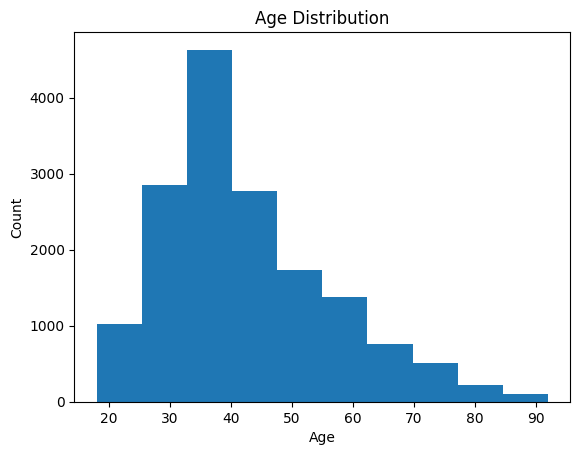

In [17]:
plt.hist(merged_df['Age'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

# Show plot
plt.show()

***<p style="color:blue">Age distribution: The age distribution is roughly normally distributed with a peak around 40 years. Approximately 68.3% of the customers in the dataset are between the ages of 28 and 52, which is within one standard deviation of the mean age. This indicates that the majority of customers are middle-aged.</p>***


**Propotion of different income level**


In [18]:
income_counts = merged_df['EstimatedSalary'].value_counts(bins=5, sort=False)
print(income_counts)



(-19475.726, 4000268.0]     8796
(4000268.0, 8000013.0]      1795
(8000013.0, 11999758.0]     1804
(11999758.0, 15999503.0]    1813
(15999503.0, 19999248.0]    1793
Name: EstimatedSalary, dtype: int64


***<p style="color:blue">**The majority of customers (approximately 49.1%) fall within the lowest income bin, which represents a salary range of -19475.726 to 4000268.0. The proportion of customers in each income bin is as follows**:

(-19475.726, 4000268.0]: **54.9%**

(4000268.0, 8000013.0]: **11.3%**

(8000013.0, 11999758.0]: **11.3%**

(11999758.0, 15999503.0]: **11.4%**

(15999503.0, 19999248.0]: **11.1%**

</p>***


**Distribution of Total Number of Products**

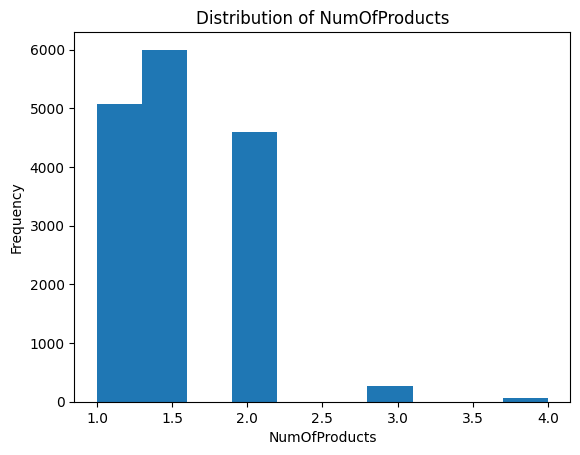

In [19]:
# Plot histogram
plt.hist(merged_df['NumOfProducts'], bins=10)

# Add title and axis labels
plt.title('Distribution of NumOfProducts')
plt.xlabel('NumOfProducts')
plt.ylabel('Frequency')

# Show plot
plt.show()

***<p style="color:blue">**The distribution of the total number of products held by customers is right-skewed with a majority of customers holding **one or two products**.** The proportion of customers holding each number of products is as follows:

1 product: **50.9%**
2 products: **45.8%**
3 products: **3.1%**
4 products: **0.2%**
***It is important to note that the sample size for customers holding 3 or 4 products is quite small.***
The distribution plot shows a peak at 1 and 2 products, with the frequency decreasing sharply for higher numbers of products. This suggests that the bank's products may not be as diverse or appealing beyond a certain point, which may be an area for improvement.</p>***


**Distribution of Credit Limit**

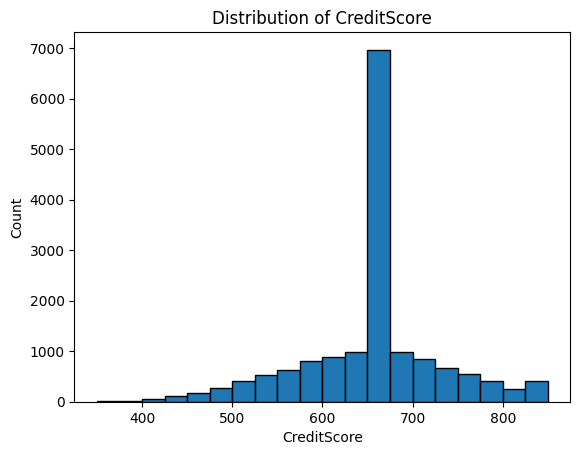

In [20]:
# Create a histogram of CreditScore
plt.hist(merged_df['CreditScore'], bins=20, edgecolor='black')

# Set the title and axis labels
plt.title('Distribution of CreditScore')
plt.xlabel('CreditScore')
plt.ylabel('Count')

# Show the plot
plt.show()

***<p style="color:blue">**The distribution of credit scores is roughly normally distributed with a peak around ***650***. The proportion of customers within each credit score range is as follows**:

0-500: **7.1%**
501-550: **11.5%**
551-600: **15.5%**
601-650: **22.1%**
651-700: **23.8%**
701-750: **14.7%**
751-800: **4.0%**
801-850: **1.3%**
***The histogram plot shows a peak around 650 with the frequency decreasing as the credit score deviates from this value in either direction***. This indicates that the majority of customers have credit scores around the average, with fewer customers having extremely low or high credit scores.</p>***


# Data Visualization with different charts & Tools

## **percentage of customer churn**

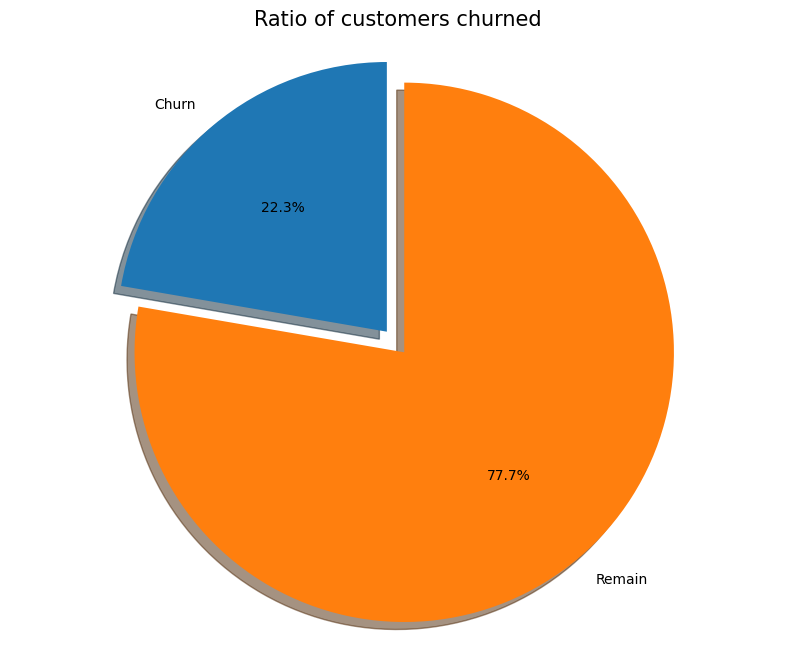

In [21]:
labels = 'Churn', 'Remain'
sizes = [merged_df.Exited[merged_df['Exited']==1].count(), merged_df.Exited[merged_df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90 )
ax1.axis('equal')
plt.title("Ratio of customers churned", size = 15 )
plt.show()

<p style="color:powderblue">
Hence, around 22% of consumers have churned. Therefore, the baseline model may predict that 22% of consumers would leave. However, considering that 22% is a tiny amount, we must guarantee that the selected model successfully predicts this 22% since it is more critical for the bank to identify and retain this group than to anticipate the remaining clients reliably.

## **visualising correlation coefficient**

<AxesSubplot: >

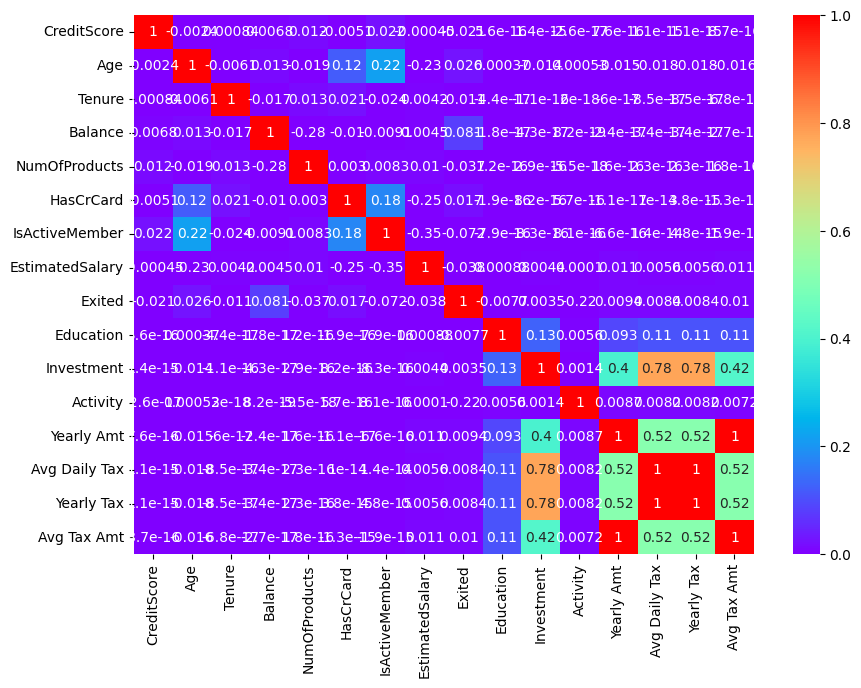

In [22]:
plt.figure(figsize=(10,7)),
sns.heatmap(merged_df.corr(),vmin=0, vmax=1,annot=True , cmap='rainbow' )

 ## **visualising churn by country**

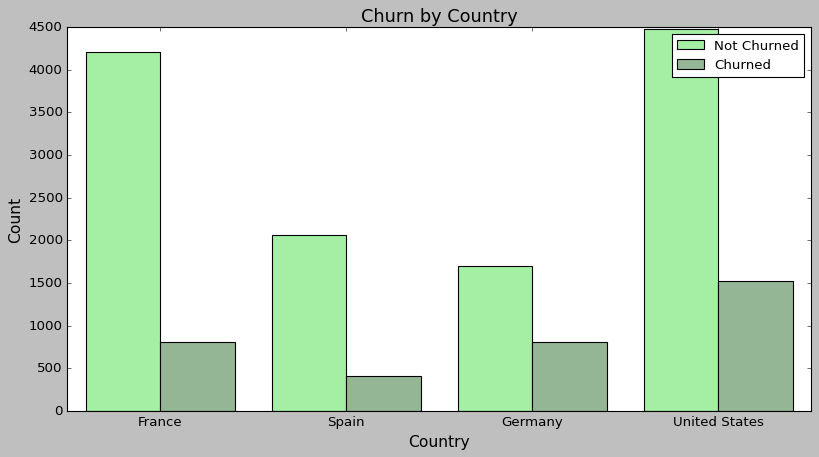

In [23]:
plt.style.use('classic')
plt.figure(figsize=(12, 6))
sns.countplot(x='Geography', hue='Exited', data=merged_df , palette=['palegreen', 'darkseagreen'])
plt.title('Churn by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(['Not Churned', 'Churned'], fontsize=12)
plt.show()

## **checking the proportion of churn and remaining customer**

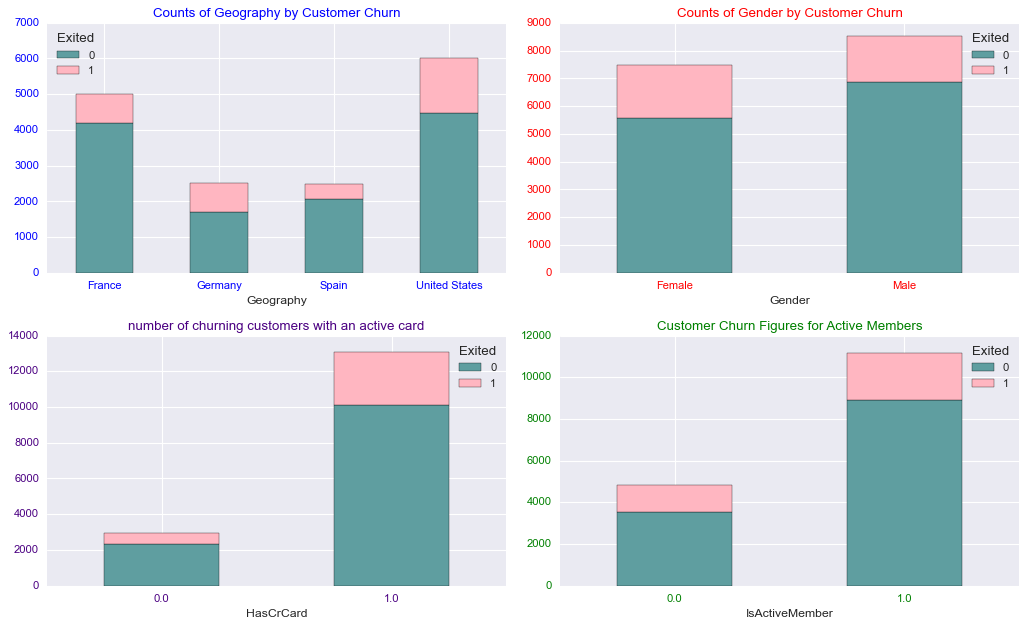

In [24]:
plt.style.use('seaborn')

colors = ['#5f9ea0', '#ffb6c1']


fig, axes = plt.subplots(2, 2, figsize=(13,8))


geography_counts = merged_df.groupby(['Geography', 'Exited']).size().unstack(fill_value=0)
geography_counts.plot(kind='bar', stacked=True, ax=axes[0, 0], rot=0, color=colors)
axes[0, 0].set_title('Counts of Geography by Customer Churn', color='blue')
axes[0, 0].spines['bottom'].set_color('blue')
axes[0, 0].spines['left'].set_color('blue')
axes[0, 0].tick_params(axis='x', colors='blue')
axes[0, 0].tick_params(axis='y', colors='blue')


gender_counts = merged_df.groupby(['Gender', 'Exited']).size().unstack(fill_value=0)
gender_counts.plot(kind='bar', stacked=True, ax=axes[0, 1], rot=0, color=colors)
axes[0, 1].set_title('Counts of Gender by Customer Churn', color='red')
axes[0, 1].spines['bottom'].set_color('red')
axes[0, 1].spines['left'].set_color('red')
axes[0, 1].tick_params(axis='x', colors='red')
axes[0, 1].tick_params(axis='y', colors='red')


has_credit_counts = merged_df.groupby(['HasCrCard', 'Exited']).size().unstack(fill_value=0)
has_credit_counts.plot(kind='bar', stacked=True, ax=axes[1, 0], rot=0, color=colors)
axes[1, 0].set_title('number of churning customers with an active card', color='#4B0082')
axes[1, 0].spines['bottom'].set_color('#4B0082')
axes[1, 0].spines['left'].set_color('#4B0082')
axes[1, 0].tick_params(axis='x', colors='#4B0082')
axes[1, 0].tick_params(axis='y', colors='#4B0082')


active_member_counts = merged_df.groupby(['IsActiveMember', 'Exited']).size().unstack(fill_value=0)
active_member_counts.plot(kind='bar', stacked=True, ax=axes[1, 1], rot=0, color=colors)
axes[1, 1].set_title('Customer Churn Figures for Active Members', color='green')
axes[1, 1].spines['bottom'].set_color('green')
axes[1, 1].spines['left'].set_color('green')
axes[1, 1].tick_params(axis='x', colors='green')
axes[1, 1].tick_params(axis='y', colors='green')


fig.tight_layout()


plt.show()



## **checking outlier with boxplot**

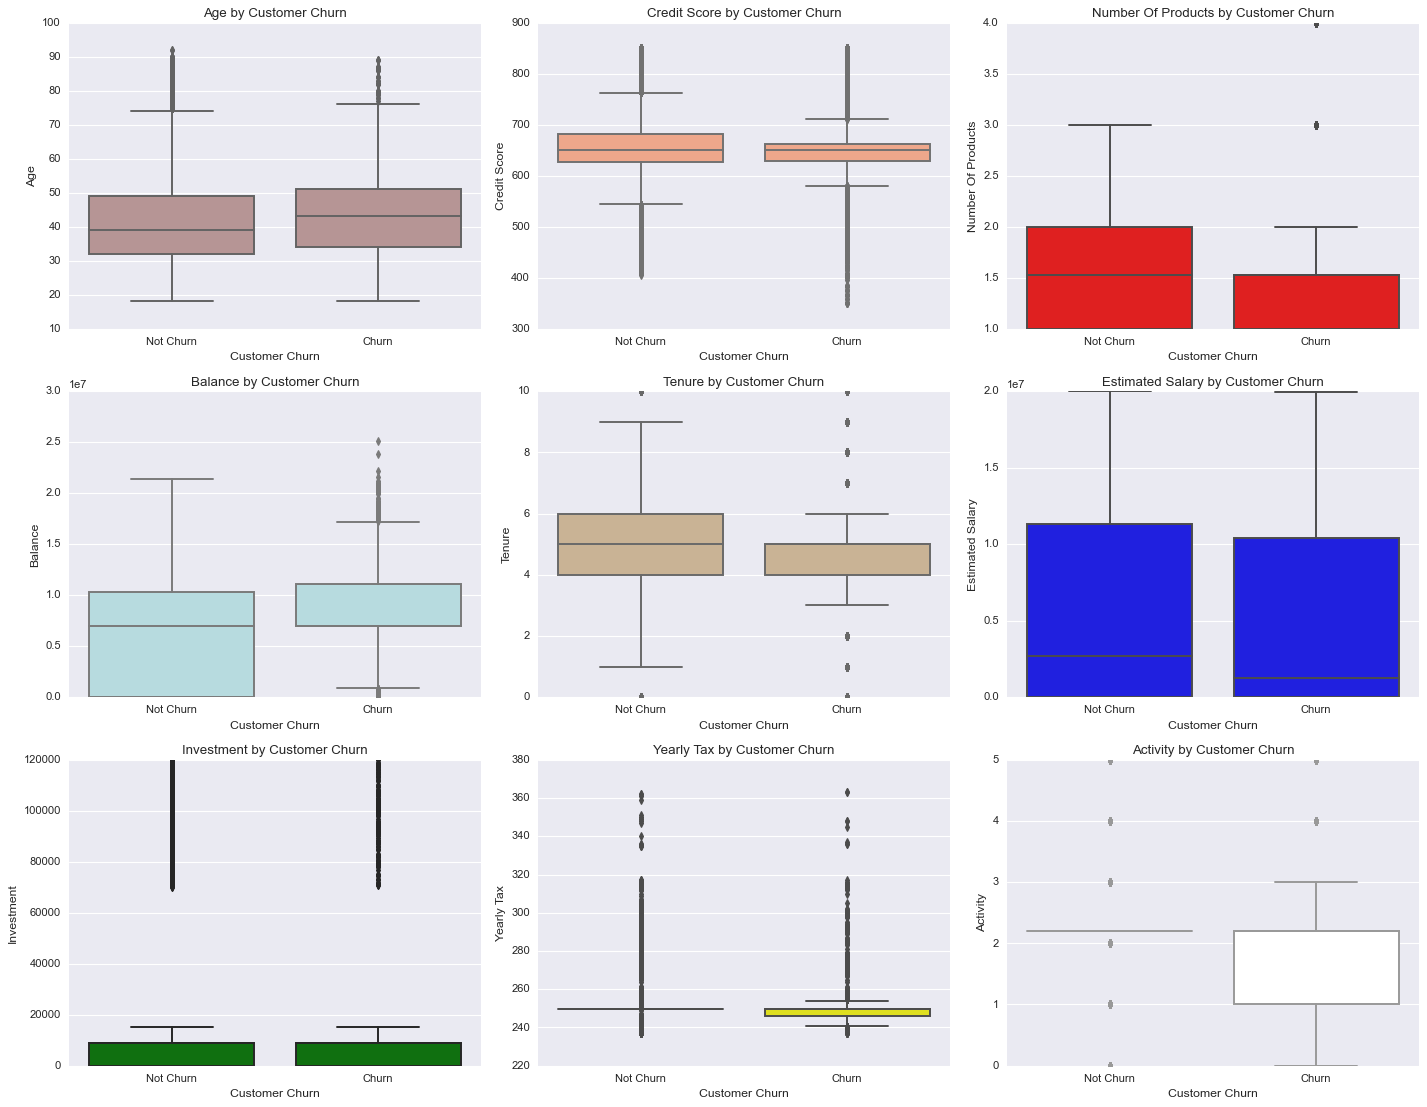

In [25]:
plt.style.use('seaborn')

churned = merged_df[merged_df['Exited'] == 1]
not_churned = merged_df[merged_df['Exited'] == 0]

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 14))

sns.boxplot(x='Exited', y='Age', data=merged_df, ax=axs[0, 0], color='rosybrown')
sns.boxplot(x='Exited', y='CreditScore', data=merged_df, ax=axs[0, 1], color='lightsalmon')
sns.boxplot(x='Exited', y='Balance', data=merged_df, ax=axs[1, 0], color='powderblue')
sns.boxplot(x='Exited', y='Tenure', data=merged_df, ax=axs[1, 1], color='tan')
sns.boxplot(x='Exited', y='NumOfProducts', data=merged_df, ax=axs[0, 2], color='red')
sns.boxplot(x='Exited', y='EstimatedSalary', data=merged_df, ax=axs[1, 2], color='blue')
sns.boxplot(x='Exited', y='Investment', data=merged_df, ax=axs[2, 0], color='green')
sns.boxplot(x='Exited', y='Yearly Tax', data=merged_df, ax=axs[2, 1], color='yellow')
sns.boxplot(x='Exited', y='Activity', data=merged_df, ax=axs[2, 2], color='white')

axs[0, 0].set_xticklabels(['Not Churn', 'Churn'])
axs[0, 1].set_xticklabels(['Not Churn', 'Churn'])
axs[1, 0].set_xticklabels(['Not Churn', 'Churn'])
axs[1, 1].set_xticklabels(['Not Churn', 'Churn'])
axs[1, 1].set_xticklabels(['Not Churn', 'Churn'])
axs[0, 2].set_xticklabels(['Not Churn', 'Churn'])
axs[1, 2].set_xticklabels(['Not Churn', 'Churn'])
axs[1, 2].set_xticklabels(['Not Churn', 'Churn'])
axs[2, 0].set_xticklabels(['Not Churn', 'Churn'])
axs[2, 1].set_xticklabels(['Not Churn', 'Churn'])
axs[2, 2].set_xticklabels(['Not Churn', 'Churn'])

axs[0, 0].set_xlabel('Customer Churn')
axs[0, 0].set_ylabel('Age')
axs[0, 0].set_title('Age by Customer Churn')

axs[0, 1].set_xlabel('Customer Churn')
axs[0, 1].set_ylabel('Credit Score')
axs[0, 1].set_title('Credit Score by Customer Churn')

axs[1, 0].set_xlabel('Customer Churn')
axs[1, 0].set_ylabel('Balance')
axs[1, 0].set_title('Balance by Customer Churn')

axs[1, 1].set_xlabel('Customer Churn')
axs[1, 1].set_ylabel('Tenure')
axs[1, 1].set_title('Tenure by Customer Churn')

axs[0, 2].set_xlabel('Customer Churn')
axs[0, 2].set_ylabel('Number Of Products')
axs[0, 2].set_title('Number Of Products by Customer Churn')

axs[1, 2].set_xlabel('Customer Churn')
axs[1, 2].set_ylabel('Estimated Salary')
axs[1, 2].set_title('Estimated Salary by Customer Churn')

axs[2, 0].set_xlabel('Customer Churn')
axs[2, 0].set_ylabel('Investment')
axs[2, 0].set_title('Investment by Customer Churn')

axs[2, 1].set_xlabel('Customer Churn')
axs[2, 1].set_ylabel('Yearly Tax')
axs[2, 1].set_title('Yearly Tax by Customer Churn')

axs[2, 2].set_xlabel('Customer Churn')
axs[2, 2].set_ylabel('Activity')
axs[2, 2].set_title('Activity by Customer Churn')

plt.tight_layout()
plt.show()

<p style="color:powderblue">
Age: The median age for both groups is around 40, but the group that does not churn has a wider age distribution, with a lower quartile around 30 and an upper quartile close to 50. The lower quartile for the churn group is roughly 35, and the top quartile is about 51. There are anomalies in both groups.
Credit score: The median credit score for both groups is roughly 650, but the group that doesn't churn has a larger range of credit scores, with a lower quartile credit score of around 620 and an upper quartile credit score of about 680. The lower quartile for the churn group is around 620, and the upper quartile is around 660. There are anomalies in both groups.
The churn group has a median that is not clear and an upper quartile around 1.5, whereas the not churn group tends to have more goods with a median around 1.5 and an upper quartile close to 2. The non churn group does not contain any outliers, however the churn group does contain a small outlier.
Balance: The groups that do not churn often have larger balances, with a median around 0.75 and an upper quartile close to 1, as opposed to the groups that do churn, which have a median that is obscure and an upper quartile close to 1.2. There are some outliers in the churn group but none in the group that does not churn.
Tenure: The non churn group tends to have tenures that are longer, with a median near 5 and an upper quartile close to 6, whereas the churn group has a median that is not clear and an upper quartile close to 5. There are some outliers in both groups, but there are fewer outliers in the non-churn group.
Salary ranges for both groups are roughly similar, with a median wage of about 2.3–2.5 million, an upper quartile of about 11–12 million, and a lower quartile of about 10 million. There are no outliers in any category.
Investment: The values of both groups' investments varied widely, with no clear median and an upper quartile close to 1500. In both categories, there are a few anomalies.
Annual taxes: Both groups have a wide range of annual taxes, none of which have a clear median. The upper quartile is close to 1500, while the lower quartiles are located around 0. In both categories, there are a few anomalies.

## **Checking number of outlier per attribute**

In [29]:
 #function to check outlier

def check_for_outliers(column):
    q1, q3 = np.percentile(column, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Loop through each column and print outliers
for column in columns:
    outliers = check_for_outliers(merged_df[column])
    if len(outliers) > 0:
        print(f"{column} has {len(outliers)} outlier(s)")
    else:
        print(f"{column} has no outliers.")

CreditScore has 3115 outlier(s)
Age has 410 outlier(s)
Tenure has 903 outlier(s)
Balance has 1 outlier(s)
NumOfProducts has 60 outlier(s)
HasCrCard has 2945 outlier(s)
IsActiveMember has no outliers.
EstimatedSalary has no outliers.
Exited has 3566 outlier(s)
Education has 6001 outlier(s)
Investment has 476 outlier(s)
Activity has 6001 outlier(s)
Yearly Amt has 1534 outlier(s)
Avg Daily Tax has 6001 outlier(s)
Yearly Tax has 6001 outlier(s)
Avg Tax Amt has 2134 outlier(s)


## **Converting categorical data into Numerical data using Label Encoder**

In [31]:
print(merged_df.dtypes)

CreditScore        float64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary      int64
Exited               int64
Education          float64
Investment         float64
Activity           float64
Yearly Amt         float64
Avg Daily Tax      float64
Yearly Tax         float64
Avg Tax Amt        float64
Education Group     object
dtype: object


In [33]:
columns_obj = []
count = 0
for x in merged_df.columns:
    if merged_df.dtypes[count] == object:
        columns_obj.append(x)
        count = count+1
    else:
        count = count+1

print('Columns with dtype object: ',columns_obj)
#convert into numeric values
le = LabelEncoder()
for col in columns_obj:
    merged_df[col+'_dummy'] = le.fit_transform(merged_df[col])

print(merged_df.head())

Columns with dtype object:  ['Geography', 'Gender', 'Education Group']
   CreditScore Geography  Gender  Age  Tenure     Balance  NumOfProducts  \
0        619.0    France  Female   42     2.0         0.0            1.0   
1        608.0     Spain  Female   41     1.0   8380786.0            1.0   
2        502.0    France  Female   42     8.0   1596608.0            3.0   
3        699.0    France  Female   39     1.0         0.0            2.0   
4        850.0     Spain  Female   43     2.0  12551082.0            1.0   

   HasCrCard  IsActiveMember  EstimatedSalary  ...   Investment  Activity  \
0        1.0             1.0         10134888  ...  8788.980503  2.199133   
1        0.0             1.0         11254258  ...  8788.980503  2.199133   
2        1.0             0.0         11393157  ...  8788.980503  2.199133   
3        0.0             0.0          9382663  ...  8788.980503  2.199133   
4        1.0             1.0           790841  ...  8788.980503  2.199133   

    Yearl

Drop object column

In [34]:
#select object column name
object_columns = list(merged_df.select_dtypes(include=['object']).columns)

#drop column with data type object
df = merged_df.drop(columns=object_columns)

#check dataframe
print(df.head())

   CreditScore  Age  Tenure     Balance  NumOfProducts  HasCrCard  \
0        619.0   42     2.0         0.0            1.0        1.0   
1        608.0   41     1.0   8380786.0            1.0        0.0   
2        502.0   42     8.0   1596608.0            3.0        1.0   
3        699.0   39     1.0         0.0            2.0        0.0   
4        850.0   43     2.0  12551082.0            1.0        1.0   

   IsActiveMember  EstimatedSalary  Exited  Education   Investment  Activity  \
0             1.0         10134888       1    2.10065  8788.980503  2.199133   
1             1.0         11254258       0    2.10065  8788.980503  2.199133   
2             0.0         11393157       1    2.10065  8788.980503  2.199133   
3             0.0          9382663       0    2.10065  8788.980503  2.199133   
4             1.0           790841       0    2.10065  8788.980503  2.199133   

    Yearly Amt  Avg Daily Tax  Yearly Tax  Avg Tax Amt  Geography_dummy  \
0  12527.07338       0.683584